# Task 1 Regression

#### a)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import scipy.stats as st    
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, RandomForestRegressor, GradientBoostingRegressor
from sklearn.neural_network import MLPClassifier,MLPRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.svm import SVC,SVR
from sklearn.metrics import confusion_matrix

In [2]:
reg=pd.read_csv("C:/Datasets BITS/Regression.csv")

In [3]:
reg.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [4]:
reg.tail()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
550063,M,51-55,13,B,1,1,20,NaN,NaN,368
550064,F,26-35,1,C,3,0,20,NaN,NaN,371
550065,F,26-35,15,B,4+,1,20,NaN,NaN,137
550066,F,55+,1,C,2,0,20,NaN,NaN,365
550067,F,46-50,0,B,4+,1,20,NaN,NaN,490


In [5]:
reg.describe()

,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [6]:
reg.shape

(550068, 10)

In [7]:
reg.dtypes

Gender                         object
Age                            object
Occupation                      int64
City_Category                  object
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                        int64
dtype: object

#### b)

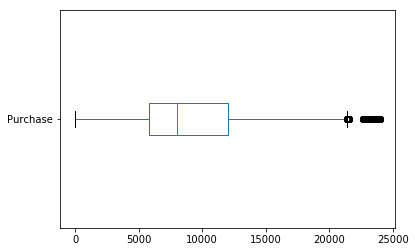

In [8]:
reg.Purchase.plot(kind='box',vert=False)

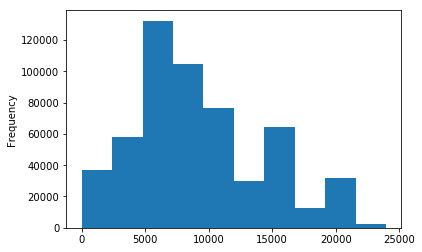

In [9]:
reg.Purchase.plot(kind='hist')

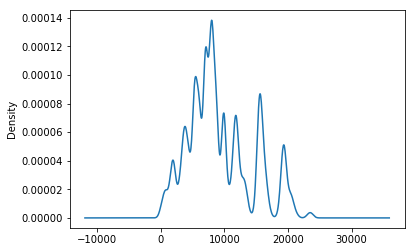

In [11]:
reg.Purchase.plot(kind='density')

#### c)

# Hypothesis Testing

### 1) Gender with Purchase

Null Hypothesis: there is no significant difference in the avg purchases of male & female - both means are equal
Alternate Hypothesis : there is significant difference in avg. purchases of male & female - both means are not equal

In [12]:
reg.Purchase.groupby(reg.Gender).mean()

Gender
F    8734.565765
M    9437.526040
Name: Purchase, dtype: float64

In [13]:
male=reg[reg.Gender=='M']
female=reg[reg.Gender=='F']

In [14]:
st.ttest_ind(male.Purchase,female.Purchase)

Ttest_indResult(statistic=44.837957934353966, pvalue=0.0)

Result :  Since, p-value is less than 0.05, we reject the Null hypothesis and accept the Alternate hypothesis

### 2) Age with Purchase
Null Hypothesis: there is no significant difference in the avg purchases of different ages - both means are equal<br/>
Alternate Hypothesis : there is significant difference in avg. purchases of different ages - both means are not equal

In [15]:
reg.Age.value_counts()

26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: Age, dtype: int64

In [16]:
reg.Purchase.groupby(reg.Age).mean()

Age
0-17     8933.464640
18-25    9169.663606
26-35    9252.690633
36-45    9331.350695
46-50    9208.625697
51-55    9534.808031
55+      9336.280459
Name: Purchase, dtype: float64

In [17]:
a1=reg[reg.Age=='0-17']
a2=reg[reg.Age=='18-25']
a3=reg[reg.Age=='26-35']
a4=reg[reg.Age=='36-45']
a5=reg[reg.Age=='46-50']
a6=reg[reg.Age=='51-55']
a7=reg[reg.Age=='55+']

In [18]:
st.f_oneway(a1.Purchase,a2.Purchase,a3.Purchase,a4.Purchase,a5.Purchase,a6.Purchase,a7.Purchase)

F_onewayResult(statistic=40.57579909450407, pvalue=1.053563939251671e-49)

Result : since p value is less than 0.05 REJECT null hypothesis that the avg. purchases of all seven age groups is equal. the difference is statistically significant

### 3) City Category with Purchases

Null Hypothesis: there is no significant difference in the avg purchases of different city categories  - both means are equal<br/>
Alternate Hypothesis : there is significant difference in avg. purchases of different city categories - both means are not equal

In [19]:
reg.City_Category.value_counts()

B    231173
C    171175
A    147720
Name: City_Category, dtype: int64

In [20]:
reg.Purchase.groupby(reg.City_Category).mean()

City_Category
A    8911.939216
B    9151.300563
C    9719.920993
Name: Purchase, dtype: float64

In [21]:
a=reg[reg.City_Category=='A']
b=reg[reg.City_Category=='B']
c=reg[reg.City_Category=='C']

In [22]:
st.f_oneway(a.Purchase,b.Purchase,c.Purchase)

F_onewayResult(statistic=1130.7459610102974, pvalue=0.0)

Result  : since p value is less than 0.05 REJECT null hypothesis that the avg. purchases of all seven age groups is equal. the difference is statistically significant

### 4) Marital Status with Purchases
Null Hypothesis: there is no significant difference in the avg purchases of married & unmarried - both means are equal<br/>
Alternate Hypothesis : there is significant difference in avg. purchases of married & unmarried - both means are not equal

In [23]:
reg.Marital_Status.value_counts()

0    324731
1    225337
Name: Marital_Status, dtype: int64

In [24]:
reg.Purchase.groupby(reg.Marital_Status).mean()

Marital_Status
0    9265.907619
1    9261.174574
Name: Purchase, dtype: float64

In [25]:
married=reg[reg.Marital_Status==1]
unmarried=reg[reg.Marital_Status==0]

In [26]:
st.ttest_ind(married.Purchase,unmarried.Purchase)

Ttest_indResult(statistic=-0.34366980554405258, pvalue=0.73109475257583156)

Result : since the p value is greater than 0.05 Accept the NULL Hypothesis i.e.. there is no significant difference in the avg purchases of married & unmarried persons.

### 5)Occupation with City Category
NULL Hypothesis : there is no relation between Occupation and City Category <br/>
ALTERNATE Hypothesis: there is relation between Occupation and City Category

In [27]:
pd.crosstab(reg.Occupation,reg.City_Category)

City_Category,A,B,C
Occupation,,,
0,18858,29850,20930
1,12809,19756,14861
2,9232,11366,5990
3,5645,6905,5100
4,24205,29854,18249
5,2383,6615,3179
6,3755,10953,5647
7,16216,22986,19931
8,104,829,613


In [28]:
st.chi2_contingency(pd.crosstab(reg.Occupation,reg.City_Category))

(19332.051033740736,
 0.0,
 40,
 array([[ 18701.1885076 ,  29266.24594414,  21670.56554826],
        [ 12736.18665329,  19931.3733902 ,  14758.43995651],
        [  7140.17059709,  11173.94162903,   8273.88777388],
        [  4739.883069  ,   7417.6346379 ,   5492.4822931 ],
        [ 19418.21331181,  30388.347048  ,  22501.43964019],
        [  3270.11649469,   5117.53750627,   3789.34599904],
        [  5466.30707476,   8554.44493226,   6334.24799298],
        [ 15880.08529854,  24851.38748118,  18401.52722027],
        [   415.17616004,    649.72595752,    481.09788244],
        [  1689.43934204,   2643.87192674,   1957.68873121],
        [  3472.33360239,   5433.99523332,   4023.67116429],
        [  3111.40426275,   4869.16231811,   3605.43341914],
        [  8373.07729226,  13103.36716006,   9702.55554768],
        [  2075.34370296,   3247.78926242,   2404.86703462],
        [  7333.79414909,  11476.95095334,   8498.25489758],
        [  3266.8939113 ,   5112.49435524,   3785.611

Result :  since the p value is greter than 0.05 we accept the NULL hypothesis i.e.., there is no relation between Occupation and City Category

### 6) Occupation with Gender
NULL Hypothesis : there is no relation between Occupation and Gender <br/>
ALTERNATE Hypothesis: there is relation between Occupation and Gender

In [29]:
pd.crosstab(reg.Occupation,reg.Gender)

Gender,F,M
Occupation,,
0,18112,51526
1,17984,29442
2,8629,17959
3,7919,9731
4,17836,54472
5,2220,9957
6,8160,12195
7,10028,49105
8,361,1185


In [30]:
st.chi2_contingency(pd.crosstab(reg.Occupation,reg.Gender))

(41664.592979596964, 0.0, 20, array([[ 17193.26909037,  52444.73090963],
        [ 11709.23891955,  35716.76108045],
        [  6564.44238167,  20023.55761833],
        [  4357.6955031 ,  13292.3044969 ],
        [ 17852.47855174,  54455.52144826],
        [  3006.43955475,   9170.56044525],
        [  5025.546287  ,  15329.453713  ],
        [ 14599.6378575 ,  44533.3621425 ],
        [   381.69956078,   1164.30043922],
        [  1553.21600057,   4737.78399943],
        [  3192.35143655,   9737.64856345],
        [  2860.5246515 ,   8725.4753485 ],
        [  7697.93700233,  23481.06299767],
        [  1908.00401405,   5819.99598595],
        [  6742.45362573,  20566.54637427],
        [  3003.47681559,   9161.52318441],
        [  6263.97125265,  19107.02874735],
        [  9886.41365613,  30156.58634387],
        [  1634.93822218,   4987.06177782],
        [  2088.97799727,   6372.02200273],
        [  8286.28761899,  25275.71238101]]))

Result :  since the p value is greter than 0.05 we accept the NULL hypothesis i.e.., there is no relation between Occupation and Gender

#### d)

In [31]:
reg.isnull().sum().sort_values(ascending=False)

Product_Category_3            383247
Product_Category_2            173638
Purchase                           0
Product_Category_1                 0
Marital_Status                     0
Stay_In_Current_City_Years         0
City_Category                      0
Occupation                         0
Age                                0
Gender                             0
dtype: int64

In [32]:
reg.shape

(550068, 10)

In [33]:
reg.dtypes

Gender                         object
Age                            object
Occupation                      int64
City_Category                  object
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                        int64
dtype: object

In [34]:
regcat=reg.select_dtypes(include=[object])
regnum=reg.select_dtypes(include=[np.number])

In [35]:
regnum.Product_Category_3=regnum.Product_Category_3.fillna(-1)

C:\Users\Santhosh\Anaconda3\lib\site-packages\pandas\core\generic.py:2999: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [36]:
regnum.Product_Category_2.fillna(regnum.Product_Category_2.value_counts().idxmax(), inplace=True)

C:\Users\Santhosh\Anaconda3\lib\site-packages\pandas\core\generic.py:3549: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [37]:
regnum.Product_Category_2.value_counts(ascending=False)

8.0     237726
14.0     55108
2.0      49217
16.0     43255
15.0     37855
5.0      26235
4.0      25677
6.0      16466
11.0     14134
17.0     13320
13.0     10531
9.0       5693
12.0      5528
10.0      3043
3.0       2884
18.0      2770
7.0        626
Name: Product_Category_2, dtype: int64

#### e)

In [38]:
le=LabelEncoder()

In [39]:
regcat1=regcat.apply(le.fit_transform)

In [40]:
reg2=pd.concat([regnum,regcat1],axis=1)

In [41]:
reg2.Product_Category_3.unique()

array([ -1.,  14.,  17.,   5.,   4.,  16.,  15.,   8.,   9.,  13.,   6.,
        12.,   3.,  18.,  11.,  10.])

#### f,g)

### 1)Multiple Linear Regression

In [42]:
lr=LinearRegression()
X=reg2.drop('Purchase',axis=1)
y=reg2['Purchase']

In [43]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [44]:
lr1=lr.fit(X_train,y_train)

In [45]:
lr1.score(X_test,y_test)

0.1515598549249505

In [46]:
lrresidual=y_test-lr1.predict(X_test)

In [47]:
np.sqrt(np.mean(lrresidual**2))

4617.1484444028411

### 2) Decision Tree Regressor

In [48]:
dt=DecisionTreeRegressor()

In [49]:
dt1=dt.fit(X_train,y_train)

In [50]:
dt1.score(X_test,y_test)

0.55501428052568103

In [51]:
dtresidual=y_test-dt1.predict(X_test)

In [52]:
np.sqrt(np.mean(dtresidual**2))

3343.7690201974783

### 3) Random Forest Regressor

In [53]:
rf=RandomForestRegressor(n_estimators=50)

In [54]:
rf1=rf.fit(X_train,y_train)

In [55]:
rf1.score(X_test,y_test)

0.62655515442102039

In [56]:
rfresidual=y_test-rf1.predict(X_test)

In [57]:
np.sqrt(np.mean(rfresidual**2))

3063.2078593398041

### 4) GradientBoostingRegressor

In [58]:
gbm= GradientBoostingRegressor()

In [59]:
gbm1=gbm.fit(X_train,y_train)

In [60]:
gbm1.score(X_test,y_test)

0.64285201092993083

In [61]:
gbmresidual=y_test-gbm1.predict(X_test)

In [62]:
np.sqrt(np.mean(gbmresidual**2))

2995.6242488572639

### 5) NeuralNetworkRegressor

In [63]:
nn=MLPRegressor()

In [65]:
nn1=nn.fit(X_train,y_train)

C:\Users\Santhosh\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


In [66]:
nn1.score(X_test,y_test)

0.35738597341260991

In [67]:
nnresidual=y_test-nn1.predict(X_test)

In [68]:
np.sqrt(np.mean(nnresidual**2))

4018.2627673119755

### 6)SupportVectorMachineRegressor

In [ ]:
svm= SVR()

In [ ]:
svm1=svm.fit(X_train,y_train)

In [ ]:
svm1.score(X_test,y_test)

In [ ]:
svmresidual=y_test-svm1.predict(X_test)

In [ ]:
np.sqrt(np.mean(svmresidual**2))

### 7)KNNRegressor

In [ ]:
knn= KNeighboursRegressor()

In [ ]:
knn1=knn.fit(X_train,y_train)

In [ ]:
knn1.score(X_test,y_test)

In [ ]:
knnresidual=y_test-knn1.predict(X_test)

In [ ]:
np.sqrt(np.mean(knnresidual**2))